## Práctica Módulo I - Beatriz Gijón



# Obtención de Datos

Lo primero que escribimos en nuestro código son todas las bibliotecas y funciones especiales que vamos a necesitar para la resolución de la práctica.  

Lurgo, empezamos por obtener los datos de pedidos utilizando el API Rest público de la empresa REE y usando la siguiente sentencia: 

GET /{lang}/datos/{category}/{widget}?[query]

Donde lang corresponde al idioma, que definiremos el es; category será en nuestro caso "mercados", widget será "precios-mercados-tiempo-real" y los parámetros del query serán:

start_date=2023-01-02T00:00 (seleccionamos la semana de enero que empieza el 2/01 y termina el 8/01)

end_date=2023-01-08T23:59

time_trunc=hour (el enunciado nos pide que sea en intervalos de una hora)

geo_limit=peninsular

geo_ids=8741 (que es el id de la zona peninsular dado por la web de REData API)


Por lo tanto, el API_URL que vamos a definir es: https://www.apidatos.ree.es/es/datos/mercados/precios-mercados-tiempo-real?start_date=2023-01-02T00:00&end_date=2023-01-08T23:59&time_trunc=hour&geo_trunc=electric_system&geo_limit=peninsular&geo_ids=8741



In [38]:
import requests
import json
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import numpy as np


API_URL= "https://apidatos.ree.es/es/datos/mercados/precios-mercados-tiempo-real?start_date=2023-01-02T00:00&end_date=2023-01-08T23:59&time_trunc=hour&geo_trunc=electric_system&geo_limit=peninsular&geo_ids=8741"
respuesta=requests.get(API_URL)
print("Código de respuesta: ", respuesta.status_code)


Código de respuesta:  200


Como obtenemos el código de respuesta 200, significa que la operación ha sido realizada correctamente. Así que mostramos la información obtenida "en cruudo" en formato json. 


In [6]:
print(respuesta.json())

{'data': {'type': 'Precios mercado peninsular en tiempo real', 'id': 'mer13', 'attributes': {'title': 'Precios mercado peninsular en tiempo real', 'last-update': '2023-01-07T20:16:55.000+01:00', 'description': None}, 'meta': {'cache-control': {'cache': 'MISS'}}}, 'included': [{'type': 'PVPC (€/MWh)', 'id': '1001', 'groupId': None, 'attributes': {'title': 'PVPC (€/MWh)', 'description': None, 'color': '#ffcf09', 'type': None, 'magnitude': 'price', 'composite': False, 'last-update': '2023-01-07T20:16:55.000+01:00', 'values': [{'value': 123.5, 'percentage': 1, 'datetime': '2023-01-02T00:00:00.000+01:00'}, {'value': 104.45, 'percentage': 1, 'datetime': '2023-01-02T01:00:00.000+01:00'}, {'value': 107.63, 'percentage': 1, 'datetime': '2023-01-02T02:00:00.000+01:00'}, {'value': 112.15, 'percentage': 1, 'datetime': '2023-01-02T03:00:00.000+01:00'}, {'value': 112.29, 'percentage': 1, 'datetime': '2023-01-02T04:00:00.000+01:00'}, {'value': 135, 'percentage': 1, 'datetime': '2023-01-02T05:00:00.00

Ahora, vamos a exportar estos ítems del json a una DATA FRAME de la biblioteca de Pandas con la función json_normalize. Como la información que queremos está en el campo "included", lo añadimos a nuestro comando. 

In [17]:
resp=respuesta.json()
df =json_normalize(resp['included'])
df

,type,id,groupId,attributes.title,attributes.description,attributes.color,attributes.type,attributes.magnitude,attributes.composite,attributes.last-update,attributes.values
0,PVPC (€/MWh),1001,None,PVPC (€/MWh),None,#ffcf09,None,price,False,2023-01-07T20:16:55.000+01:00,"[{'value': 123.5, 'percentage': 1, 'datetime':..."


El enunciado nos pide que guardemos los campos 'value', 'percentage' y 'datetime'. Como podemos observar en la tabla obtenida, estos campos están en la columna de "attributes.values", así que creamos un nuevo dataframe desanidadando dicha columna. 

In [18]:
df2=pd.DataFrame.from_records(df['attributes.values'])
df2

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
0,"{'value': 123.5, 'percentage': 1, 'datetime': ...","{'value': 104.45, 'percentage': 1, 'datetime':...","{'value': 107.63, 'percentage': 1, 'datetime':...","{'value': 112.15, 'percentage': 1, 'datetime':...","{'value': 112.29, 'percentage': 1, 'datetime':...","{'value': 135, 'percentage': 1, 'datetime': '2...","{'value': 157.13, 'percentage': 1, 'datetime':...","{'value': 161.61, 'percentage': 1, 'datetime':...","{'value': 205.91, 'percentage': 1, 'datetime':...","{'value': 205.16, 'percentage': 1, 'datetime':...",...,"{'value': 33.32, 'percentage': 1, 'datetime': ...","{'value': 33.28, 'percentage': 1, 'datetime': ...","{'value': 35.35, 'percentage': 1, 'datetime': ...","{'value': 36.17, 'percentage': 1, 'datetime': ...","{'value': 44.67, 'percentage': 1, 'datetime': ...","{'value': 49.31, 'percentage': 1, 'datetime': ...","{'value': 67.5, 'percentage': 1, 'datetime': '...","{'value': 67.66, 'percentage': 1, 'datetime': ...","{'value': 46.42, 'percentage': 1, 'datetime': ...","{'value': 40.95, 'percentage': 1, 'datetime': ..."


Como continuamos teniendo la información anidada, la vamos a desanidar utilizando una concatenación de dataframes. Para ello creamos un dataframe vacío, dff, donde vamos a ir concatenando las columnas desanidadas del dataframe df2

In [33]:
dff =pd.DataFrame()            
for i in range(df2.shape[1]):  
    dff=pd.concat([dff, pd.DataFrame.from_records(df2[i])], ignore_index=True)
dff

,value,percentage,datetime
0,123.50,1,2023-01-02T00:00:00.000+01:00
1,104.45,1,2023-01-02T01:00:00.000+01:00
2,107.63,1,2023-01-02T02:00:00.000+01:00
3,112.15,1,2023-01-02T03:00:00.000+01:00
4,112.29,1,2023-01-02T04:00:00.000+01:00
...,...,...,...
163,49.31,1,2023-01-08T19:00:00.000+01:00
164,67.50,1,2023-01-08T20:00:00.000+01:00
165,67.66,1,2023-01-08T21:00:00.000+01:00
166,46.42,1,2023-01-08T22:00:00.000+01:00


Queremos eliminar la columna que contiene el porcentaje, así que utilizamos la función "drop". 

In [34]:
dff = dff.drop(columns=['percentage'])   
dff

,value,datetime
0,123.50,2023-01-02T00:00:00.000+01:00
1,104.45,2023-01-02T01:00:00.000+01:00
2,107.63,2023-01-02T02:00:00.000+01:00
3,112.15,2023-01-02T03:00:00.000+01:00
4,112.29,2023-01-02T04:00:00.000+01:00
...,...,...
163,49.31,2023-01-08T19:00:00.000+01:00
164,67.50,2023-01-08T20:00:00.000+01:00
165,67.66,2023-01-08T21:00:00.000+01:00
166,46.42,2023-01-08T22:00:00.000+01:00


Ahora queremos calcular la media, la varianza y la desviación típica del precio de venta al público de la energía. Lo primero que hacemos es verificar que los datos están en el tipo correcto para hacer estos cálculos.  

In [36]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   value     168 non-null    float64
 1   datetime  168 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


Como los datos están en formato float64, podemos directamente calcular la media, la varianza y la desviación típica. Utilizando el siguiente código, mostraremos en la pantalla dichos valores. 

In [40]:
print ("Media PVPC = " + str(dff['value'].mean()))  
print ("Varianza PVPC = " + str(dff['value'].var()))    
print ("Desviación típica PVPC = " + str(dff['value'].std()))   

Media PVPC = 154.17708333333326
Varianza PVPC = 6166.43120521457
Desviación típica PVPC = 78.52662736431871


Finalmente, vamos a generar una gráfica de la evolución del precio de la energía frente a las horas de la semana de enero seleccionada. 

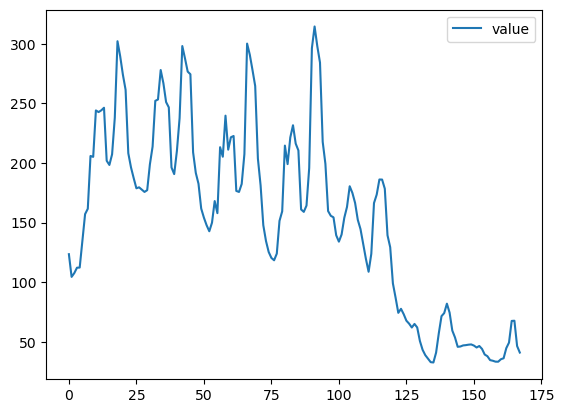

In [39]:
dff.plot()      
plt.show()  